In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [4]:
np.random.seed(42)
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

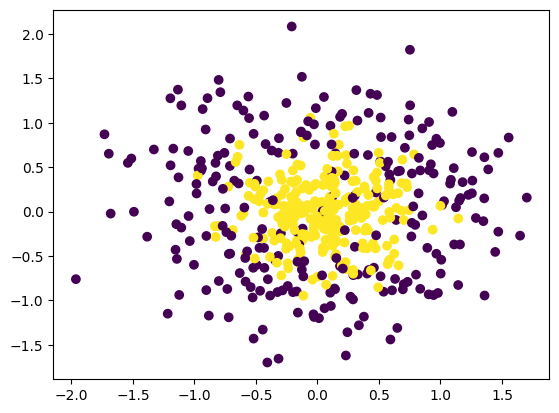

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,x,y,cv=10,scoring='accuracy'))

0.786

In [7]:
abc.fit(x,y)

AdaBoostClassifier()

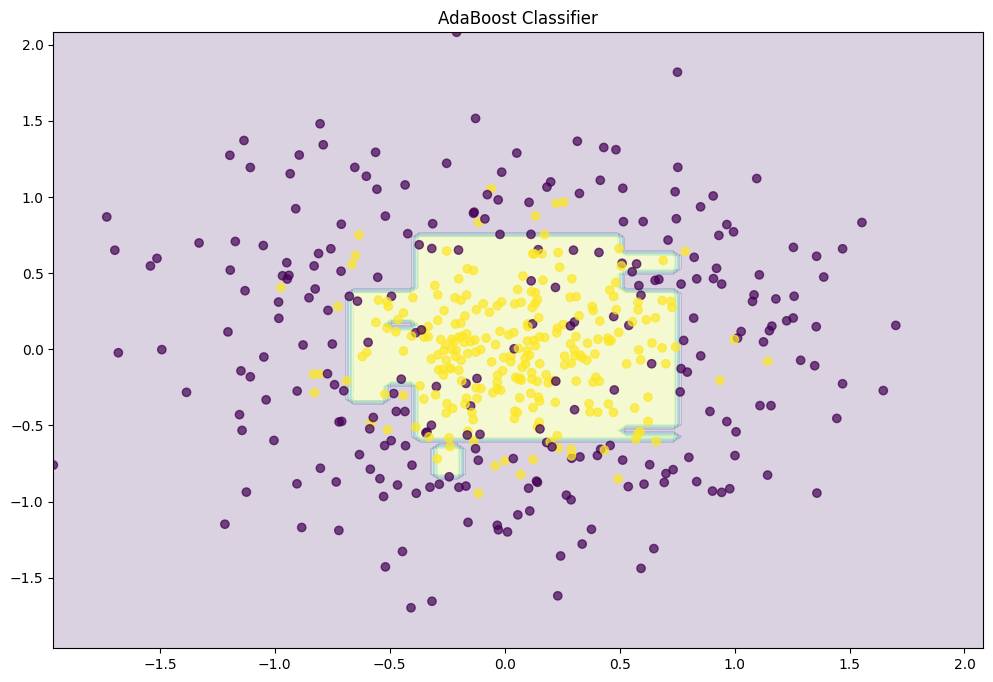

In [8]:
def plot_decision_boundary(clf):

  plt.figure(figsize=(12,8))
  x_range=np.linspace(x.min(),x.max(),100)
  xx1,xx2 = np.meshgrid(x_range,x_range)
  y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  y_hat = y_hat.reshape(xx1.shape)
  plt.contourf(xx1,xx2,y_hat,alpha=0.2)
  plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
  plt.title("AdaBoost Classifier")
  plt.show()

plot_decision_boundary(abc)

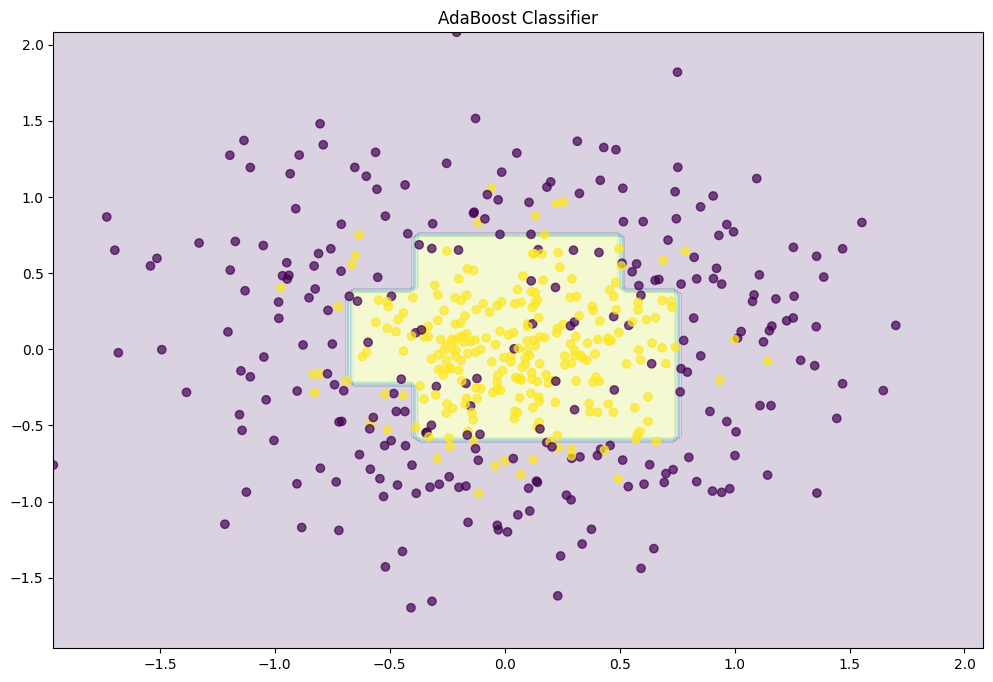

In [14]:
abc=AdaBoostClassifier(n_estimators=10)
abc.fit(x,y)
plot_decision_boundary(abc)

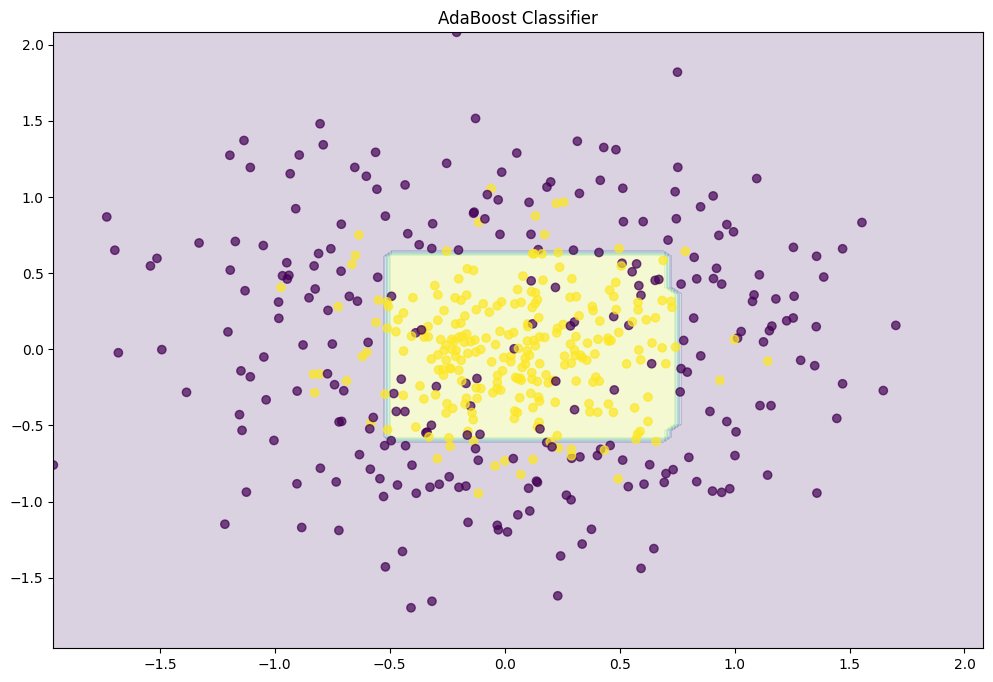

In [17]:
abc=AdaBoostClassifier(n_estimators=10,learning_rate=0.41)
abc.fit(x,y)
plot_decision_boundary(abc)

In [18]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators':[50,100,500,800],
    'learning_rate': [0.0001,0.001,0.01,0.1,1],
    'algorithm':['SAMME','SAMME.R']
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_result=grid_search.fit(x,y)

In [19]:
grid_result

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 500, 800]},
             scoring='accuracy')

In [21]:
grid_result.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}

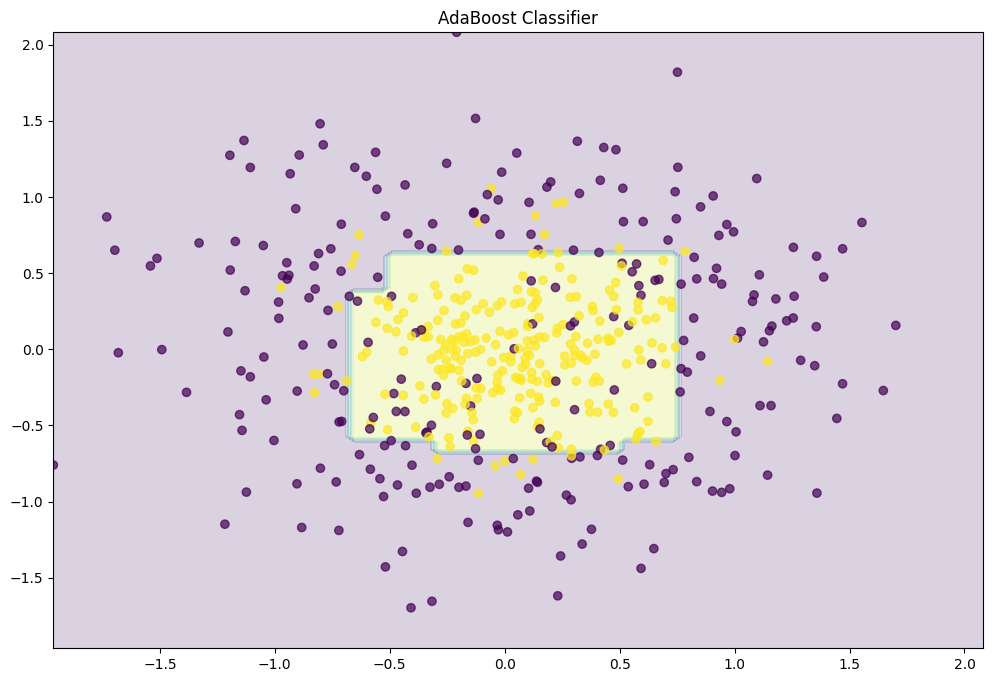

In [20]:
plot_decision_boundary(grid_result)

In [22]:
grid_result.best_score_

0.8320000000000001